In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import yaml

LABELS_PATH='images/labels.yaml'

In [2]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, 3, 1)
#         self.conv2 = nn.Conv2d(32, 64, 3, 1)
#         self.dropout1 = nn.Dropout(0.25)
#         self.dropout2 = nn.Dropout(0.5)
#         self.fc1 = nn.Linear(20736, 128)
#         self.fc2 = nn.Linear(128, 8)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = F.relu(x)
#         x = self.conv2(x)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)
#         x = self.dropout1(x)
#         x = torch.flatten(x, 1)
#         x = self.fc1(x)
#         x = F.relu(x)
#         x = self.dropout2(x)
#         x = self.fc2(x)
#         output = F.log_softmax(x, dim=1)
#         return output

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, 3, 1)
        # self.conv2 = nn.Conv2d(4, 8, 3, 1)
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(1444, 64)
        self.fc2 = nn.Linear(64, 8)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        # x = self.conv2(x)
        # x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

state_dict = torch.load('wand_cnn.pt')
model = Net()
model.load_state_dict(state_dict=state_dict)
model.to('cpu')
model.eval()

Net(
  (conv1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1444, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=8, bias=True)
)

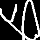

In [3]:
img = Image.open('images/train/1014.png')
img

In [4]:
data = np.reshape(np.array(img, dtype=np.float32), (1, 40, 40))

In [5]:
test = torch.utils.data.DataLoader([data], batch_size=1)

In [19]:
with open(LABELS_PATH) as f:
    label_map = yaml.load(f, Loader=yaml.SafeLoader)["labels"]
    label_map_reverse = {v:k for k,v in label_map.items()}

with torch.no_grad():
    for data in test:
        data.to('cpu')
        print(r)
        r = model(data)
        pred = r.argmax(dim=1, keepdim=True)
        pred_raw = r.max(dim=1, keepdim=True)
        print(f"{pred_raw[0][0].item()} - {pred[0][0]} - {label_map_reverse[pred[0][0].item()]}")

tensor([[-8.0435e+00, -1.3788e+01, -3.3230e-04, -1.2201e+01, -1.8684e+01,
         -1.6264e+01, -2.4830e+01, -1.2219e+01]])
-0.0003323002893012017 - 2 - incendio


In [7]:
# [key for key in state_dict.keys()]
state_dict['conv1.weight'][0]

tensor([[[-0.0666,  0.1597, -0.3104],
         [ 0.1959, -0.0677,  0.1705],
         [ 0.0427, -0.0416,  0.0921]]], device='cuda:0')